In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Features_Variant_1_train.csv', sep = ',', encoding = 'unicode_escape')

data.head()

,Page_likes,Checkins,Returns,Category,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,C1,C2,C3,C4,C5,baseTime,length,shares,promote,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,806,7.574627,0.0,69.435826,0,76,2.604478,0.0,8.505502,0,806,10.649254,1.0,70.254788,-69,806,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,806,7.574627,0.0,69.435826,0,76,2.604478,0.0,8.505502,0,806,10.649254,1.0,70.254788,-69,806,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,806,7.574627,0.0,69.435826,0,76,2.604478,0.0,8.505502,0,806,10.649254,1.0,70.254788,-69,806,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,806,7.574627,0.0,69.435826,0,76,2.604478,0.0,8.505502,0,806,10.649254,1.0,70.254788,-69,806,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0,806,11.291045,1.0,70.495138,0,806,7.574627,0.0,69.435826,0,76,2.604478,0.0,8.505502,0,806,10.649254,1.0,70.254788,-69,806,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


We delete from the dataFrame the Derived feature. 
We also delete the promote feature since none of the post are promoted.

In [6]:
data = data.drop(['Unnamed: 4'],axis='columns')
data = data.drop(['Unnamed: 5'],axis='columns')
data = data.drop(['Unnamed: 6'],axis='columns')
data = data.drop(['Unnamed: 7'],axis='columns')
data = data.drop(['Unnamed: 8'],axis='columns')
data = data.drop(['Unnamed: 9'],axis='columns')
data = data.drop(['Unnamed: 10'],axis='columns')
data = data.drop(['Unnamed: 11'],axis='columns')
data = data.drop(['Unnamed: 12'],axis='columns')
data = data.drop(['Unnamed: 13'],axis='columns')
data = data.drop(['Unnamed: 14'],axis='columns')
data = data.drop(['Unnamed: 15'],axis='columns')
data = data.drop(['Unnamed: 16'],axis='columns')
data = data.drop(['Unnamed: 17'],axis='columns')
data = data.drop(['Unnamed: 18'],axis='columns')
data = data.drop(['Unnamed: 19'],axis='columns')
data = data.drop(['Unnamed: 20'],axis='columns')
data = data.drop(['Unnamed: 21'],axis='columns')
data = data.drop(['Unnamed: 22'],axis='columns')
data = data.drop(['Unnamed: 23'],axis='columns')
data = data.drop(['Unnamed: 24'],axis='columns')
data = data.drop(['Unnamed: 25'],axis='columns')
data = data.drop(['Unnamed: 26'],axis='columns')
data = data.drop(['Unnamed: 27'],axis='columns')
data = data.drop(['Unnamed: 28'],axis='columns')
data = data.drop(['promote'],axis='columns')


In [7]:
data.head()

,Page_likes,Checkins,Returns,Category,C1,C2,C3,C4,C5,baseTime,length,shares,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
0,634995,0,463,1,0,0,0,0,0,65,166,2,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,0,0,0,0,10,132,1,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,0,0,0,0,14,133,2,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,7,0,3,7,-3,62,131,1,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,142,5,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
data.tail()

,Page_likes,Checkins,Returns,Category,C1,C2,C3,C4,C5,baseTime,length,shares,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
40944,7170111,70,497000,9,269,14,58,240,-44,56,12,1511,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
40945,7170111,70,497000,9,644,20,106,619,-86,53,149,1099,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2
40946,7170111,70,497000,9,620,620,0,620,620,19,120,2962,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,72
40947,7170111,70,497000,9,629,189,440,588,-251,33,33,1383,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,28
40948,7170111,70,497000,9,975,263,712,960,-449,29,133,3732,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,11


In [9]:
data.describe()

,Page_likes,Checkins,Returns,Category,C1,C2,C3,C4,C5,baseTime,length,shares,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,55.720384,22.186647,19.649686,52.631591,2.536961,35.322035,163.652470,117.249823,23.767833,0.122347,0.143300,0.149747,0.157489,0.144033,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,136.975705,77.124263,71.078576,128.179920,94.202974,20.916864,376.264387,945.006667,1.919829,0.327691,0.350383,0.356828,0.364265,0.351127,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,46.000000,12.000000,9.000000,44.000000,3.000000,53.000000,172.000000,61.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2079.000000,1605.000000,2184.000000,2079.000000,72.000000,21480.000000,144860.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Page_likes  40949 non-null  int64
 1   Checkins    40949 non-null  int64
 2   Returns     40949 non-null  int64
 3   Category    40949 non-null  int64
 4   C1          40949 non-null  int64
 5   C2          40949 non-null  int64
 6   C3          40949 non-null  int64
 7   C4          40949 non-null  int64
 8   C5          40949 non-null  int64
 9   baseTime    40949 non-null  int64
 10  length      40949 non-null  int64
 11  shares      40949 non-null  int64
 12  hrs         40949 non-null  int64
 13  sun_pub     40949 non-null  int64
 14  mon_pub     40949 non-null  int64
 15  tue_pub     40949 non-null  int64
 16  wed_pub     40949 non-null  int64
 17  thu_pub     40949 non-null  int64
 18  fri_pub     40949 non-null  int64
 19  sat_pub     40949 non-null  int64
 20  sun_base    40949 non-null  

data.info() prints information about the DataFrame including the index dtype and columns, non-null values and memory usage.
Here are all the columns explain in details:


 *  Page likes - number of likes the facebook page has (shows user support for a wall posts)
 *  Checkins - number of people visited the place (only applicable to places, institutions, hotels, etc. pages )   
 *  Returns - count of users that are engaged with the page ( who frequently comment, share posts of page)     
 *  Category - deﬁnes the category of source of document
 *  c1  - The total number of comments before selected base date/time
 *  c2   - The number of comments in last 24 hours, relative to base date/time. 
 *  c3 - The number of comments in last 48 to last 24 hours relative to base date/time. 
 *  c4 - The number of comments in the ﬁrst 24 hours after the publication of post but before base date/time. 
 *  c5 - The diﬀerence between c2 and c3. 
 *  baseTime   - Selected time in order to simulate the scenario. ( decimal encoding 0-71)
 *  length      - Character count in the post.
 *  shares      - This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline. 
 *  hrs         - Hours after base time when target variable is recorded 
 *  sun_pub     - day of week when post was posted
 *  mon_pub         - same
 *  tue_pub         - same
 *  wed_pub         - same
 *  thu_pub         - same
 *  fri_pub         - same
 *  sat_pub         - same
 *  sun_base    - day of week corresponding to base time (when data was collected) 
 *  mon_base  - same    
 *  tue_base       - same
 *  wed_base      - same
 *  thu_base       - same
 *  fri_base      - same
 *  sat_base       - same
 *  output - comments received after h target hours of base time

 So as you can see, the column 'output' is our target.



Check if data has null and sum them by column.

In [11]:
data.isnull().sum()

Page_likes    0
Checkins      0
Returns       0
Category      0
C1            0
C2            0
C3            0
C4            0
C5            0
baseTime      0
length        0
shares        0
hrs           0
sun_pub       0
mon_pub       0
tue_pub       0
wed_pub       0
thu_pub       0
fri_pub       0
sat_pub       0
sun_base      0
mon_base      0
tue_base      0
wed_base      0
thu_base      0
fri_base      0
sat_base      0
output        0
dtype: int64

There is no null data so no need to delete more columns.

# Data Visualization

We will normalize our data to be able to do some scatter and see something because without it scattering is illegible.

In [12]:
X_norm_train =  preprocessing.normalize(data,axis= 1, copy= True)
data_norm = pd.DataFrame(X_norm_train)
data_norm.columns = ['Page_likes', 'Checkins', 'Returns', 'Category', 'C1', 'C2','C3', 'C4', 'C5',
 'baseTime', 'length','shares', 'hrs','sun_pub','mon_pub',
'tue_pub', 'wed_pub','thu_pub', 'fri_pub', 'sat_pub', 'sun_base','mon_base',
'tue_base', 'wed_base', 'thu_base', 'fri_base', 'sat_base', 'output']
data_norm.describe()

,Page_likes,Checkins,Returns,Category,C1,C2,C3,C4,C5,baseTime,length,shares,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
count,40949.000000,40949.000000,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,0.983931,0.025268,0.058922,2.219329e-03,0.000312,0.000118,0.000112,0.000291,0.000006,0.002779,0.009694,4.827236e-04,1.853761e-03,0.000008,0.000012,0.000013,0.000012,0.000011,0.000010,0.000010,0.000010,0.000009,0.000012,0.000013,0.000011,0.000011,0.000010,0.000042
std,0.067333,0.116619,0.082028,1.218566e-02,0.001592,0.000877,0.000795,0.001434,0.001059,0.014861,0.048241,2.677416e-03,9.271261e-03,0.000105,0.000192,0.000169,0.000176,0.000144,0.000111,0.000118,0.000121,0.000103,0.000193,0.000186,0.000148,0.000144,0.000121,0.000481
min,0.047232,0.000000,0.000000,6.148958e-09,0.000000,0.000000,0.000000,0.000000,-0.055666,0.000000,0.000000,3.529626e-08,4.529982e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.994547,0.000000,0.007092,8.974622e-06,0.000005,0.000000,0.000000,0.000004,-0.000018,0.000020,0.000038,1.513713e-05,1.975170e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.999186,0.000000,0.030617,7.406945e-05,0.000039,0.000004,0.000000,0.000037,0.000000,0.000103,0.000212,6.330904e-05,8.061741e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.999888,0.000198,0.072375,6.367675e-04,0.000168,0.000039,0.000030,0.000158,0.000011,0.000684,0.001988,2.420611e-04,6.394707e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
max,1.000000,0.988442,0.567088,7.053838e-01,0.103563,0.073652,0.055666,0.073652,0.073652,0.408120,0.998865,1.718424e-01,5.155631e-01,0.005838,0.021262,0.009161,0.021482,0.011600,0.005173,0.006187,0.006187,0.004987,0.021262,0.021482,0.009161,0.011600,0.008462,0.059455


Text(0, 0.5, 'Page likes')

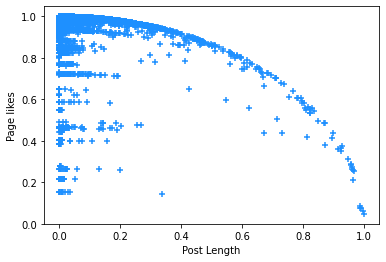

In [13]:
plt.scatter(data_norm.length,data_norm.Page_likes,color='dodgerblue',marker='+')
plt.xlabel("Post Length")
plt.ylabel("Page likes")

We can see here that more the post is long, less likes it will get.

Text(0, 0.5, 'Number of Share')

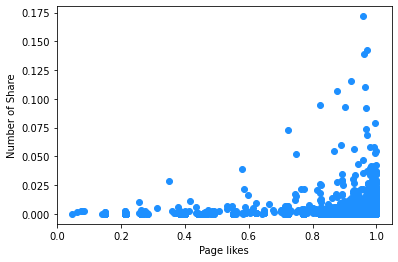

In [14]:
plt.scatter(data_norm.Page_likes, data_norm.shares,color='dodgerblue')
plt.xlabel("Page likes")
plt.ylabel("Number of Share")

Here we see that the number of share is greater when the page already got a lots of likes.

Text(0, 0.5, 'Number of comments')

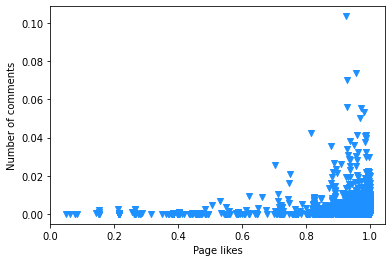

In [15]:
plt.scatter(data_norm.Page_likes, data_norm.C1,color='dodgerblue', marker='v')
plt.xlabel("Page likes")
plt.ylabel("Number of comments")

And it is similar with the comment, when a page already have a lot of likes she will get a lot of comment on her posts.

Text(0, 0.5, 'Number of comments')

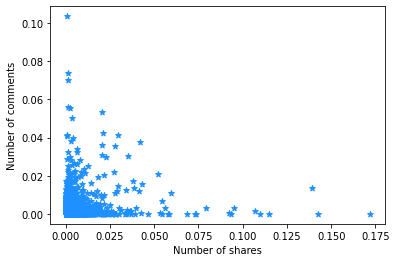

In [16]:
plt.scatter(data_norm.shares, data_norm.C1,color='dodgerblue',marker='*')
plt.xlabel("Number of shares")
plt.ylabel("Number of comments")

But now we can see that having a lot of shares doesn't mean to have a lot of comments. 

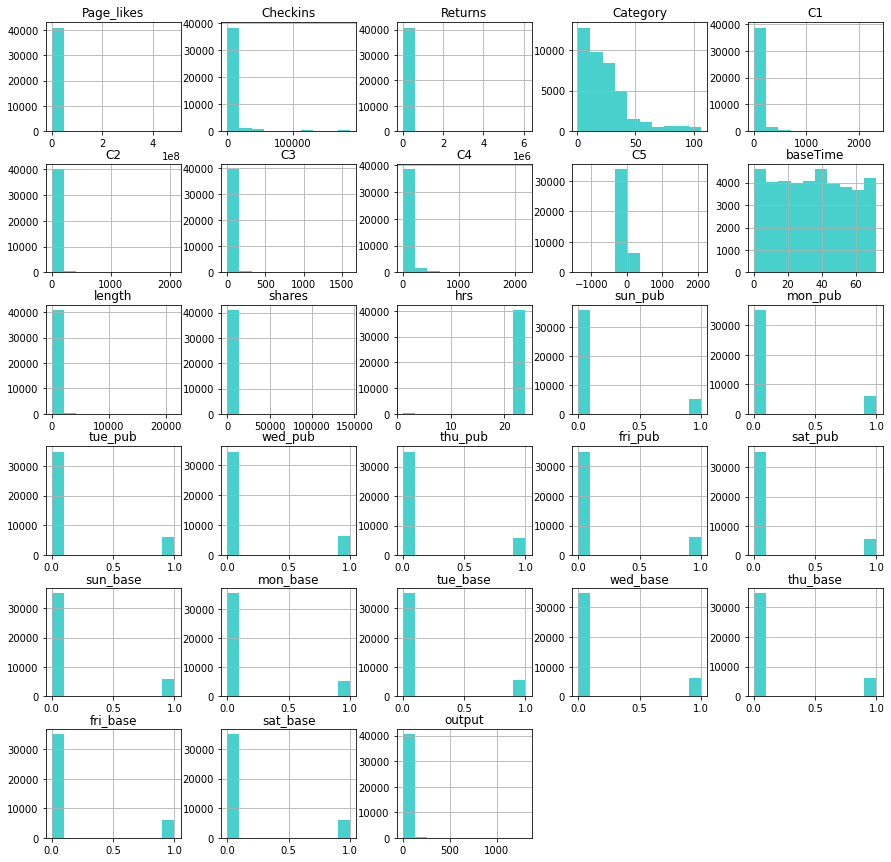

In [17]:
data.hist(figsize=(15,15), color='mediumturquoise')
plt.show()

In [18]:
data.corr()

,Page_likes,Checkins,Returns,Category,C1,C2,C3,C4,C5,baseTime,length,shares,hrs,sun_pub,mon_pub,tue_pub,wed_pub,thu_pub,fri_pub,sat_pub,sun_base,mon_base,tue_base,wed_base,thu_base,fri_base,sat_base,output
Page_likes,1.000000,0.044839,0.623436,-0.042167,0.105624,0.077773,0.071448,0.104064,0.009764,-0.005717,-0.003509,0.331114,-0.021676,-0.004057,0.000877,0.010070,0.001973,-0.003134,-0.009503,0.003397,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862,0.058918
Checkins,0.044839,1.000000,0.166850,-0.060181,0.098352,0.061610,0.064703,0.101214,0.001620,0.004760,-0.005189,0.052569,-0.014528,-0.005236,-0.006690,0.002397,0.003129,0.003990,-0.005844,0.007936,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329,0.022982
Returns,0.623436,0.166850,1.000000,-0.148685,0.329139,0.251529,0.217939,0.329399,0.041487,-0.024592,-0.011251,0.443296,-0.107347,0.007876,-0.003313,0.012920,0.033811,-0.016917,-0.027627,-0.007700,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755,0.177330
Category,-0.042167,-0.060181,-0.148685,1.000000,-0.145932,-0.103961,-0.094728,-0.148661,-0.013638,0.003876,0.037214,-0.028564,0.017831,-0.007234,-0.004734,0.004970,-0.003804,0.009626,0.002942,-0.002263,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835,-0.073673
C1,0.105624,0.098352,0.329139,-0.145932,1.000000,0.657492,0.713641,0.996736,-0.000170,0.055679,-0.005036,0.225711,-0.049533,0.014985,0.000558,0.003467,0.011700,-0.003895,-0.016800,-0.009607,-0.007981,0.001277,0.002678,0.004524,0.008977,-0.002769,-0.006884,0.326882
C2,0.077773,0.061610,0.251529,-0.103961,0.657492,1.000000,0.193922,0.689478,0.672384,-0.211857,-0.005820,0.170726,-0.011621,0.009444,-0.002892,0.007336,0.027432,-0.012986,-0.016901,-0.012104,-0.010910,-0.000257,0.004982,0.010386,0.015414,-0.006255,-0.013753,0.528696
C3,0.071448,0.064703,0.217939,-0.094728,0.713641,0.193922,1.000000,0.699315,-0.595761,0.087907,-0.003411,0.151366,-0.063407,0.008518,0.001860,0.006112,0.005166,-0.006501,-0.010799,-0.004096,-0.010383,-0.003587,-0.000525,0.001999,0.006684,0.006931,-0.001474,0.072088
C4,0.104064,0.101214,0.329399,-0.148661,0.996736,0.689478,0.699315,1.000000,0.036826,0.039560,-0.005337,0.226146,-0.047222,0.015226,0.000469,0.003053,0.013632,-0.004522,-0.017262,-0.010247,-0.008746,0.001405,0.002648,0.005174,0.009113,-0.003180,-0.006605,0.341741
C5,0.009764,0.001620,0.041487,-0.013638,-0.000170,0.672384,-0.595761,0.036826,1.000000,-0.239775,-0.002191,0.025564,0.038328,0.001304,-0.003771,0.001394,0.018561,-0.005726,-0.005689,-0.006818,-0.001098,0.002496,0.004475,0.006995,0.007576,-0.010351,-0.010148,0.378453
baseTime,-0.005717,0.004760,-0.024592,0.003876,0.055679,-0.211857,0.087907,0.039560,-0.239775,1.000000,0.000495,-0.007470,-0.025803,0.008774,-0.000252,-0.008883,-0.031862,0.014543,0.012693,0.006977,0.028345,0.030247,-0.020801,-0.035557,-0.012576,-0.000517,0.012380,-0.221962


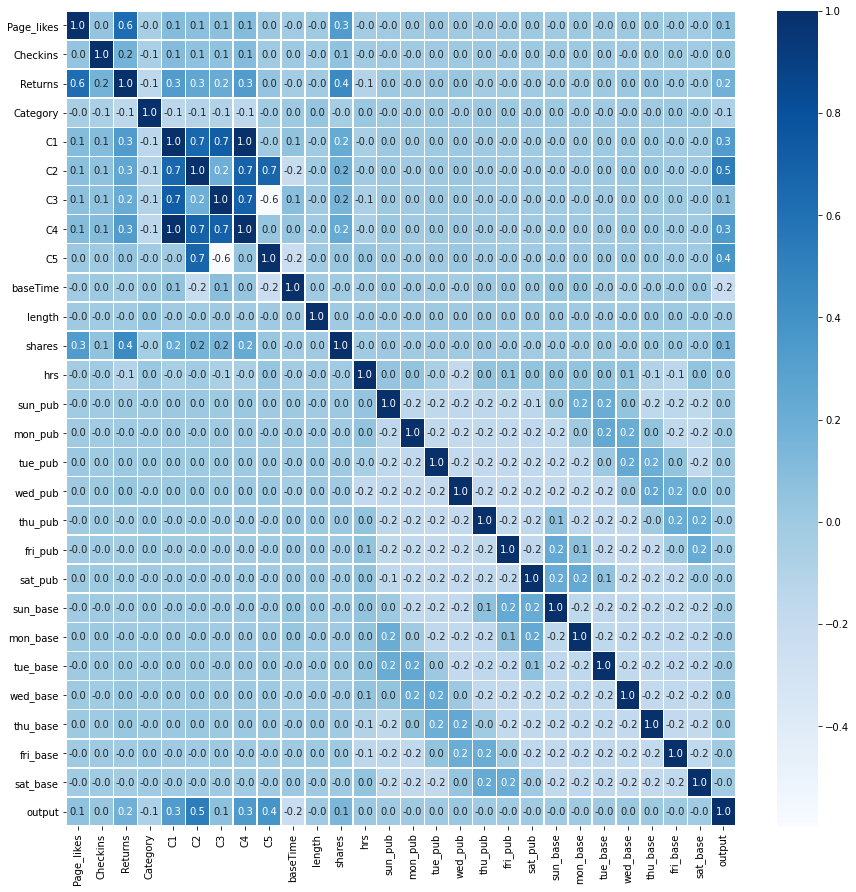

In [22]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="Blues")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the target')

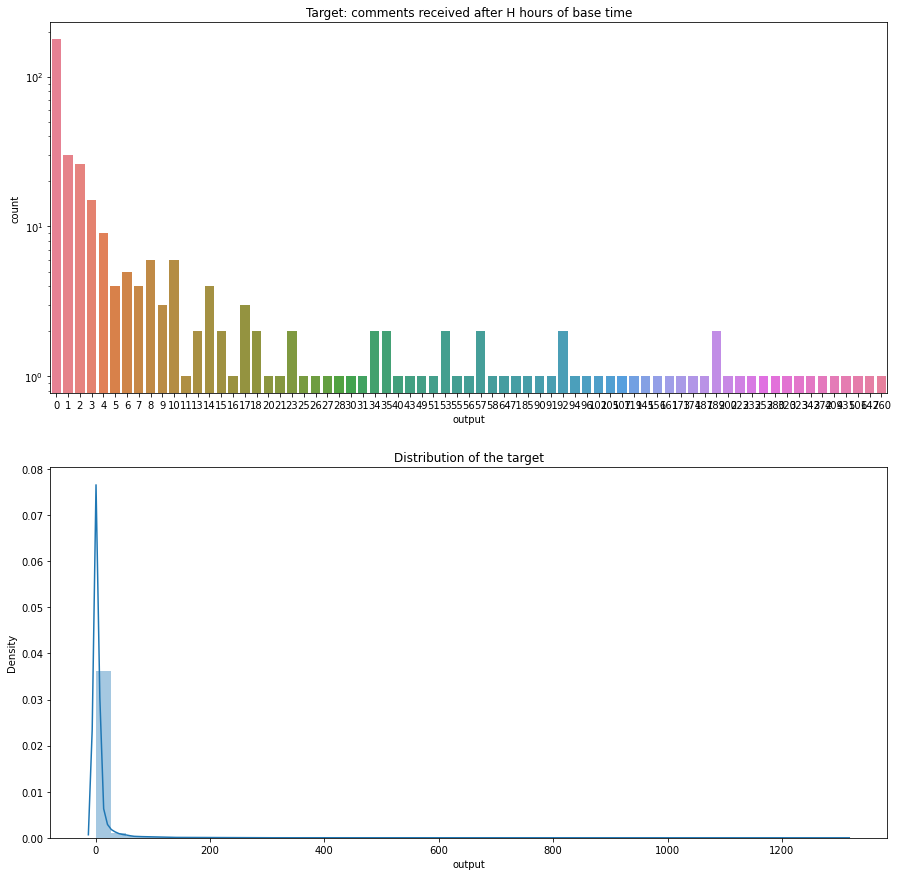

In [23]:
f,axs=plt.subplots(figsize=(15,15),nrows=2)
values=list(set(data.output.astype('int')))

sns.countplot(values,data=data.output.astype('int'), palette= 'husl',ax=axs[0])
axs[0].set(yscale='log')
axs[0].set_title('Target: comments received after H hours of base time')

sns.distplot(data.output,ax=axs[1])
axs[1].set_title('Distribution of the target')

As we can see on these two plot, most of the posts won't have any comments.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Days where people comments the most.')

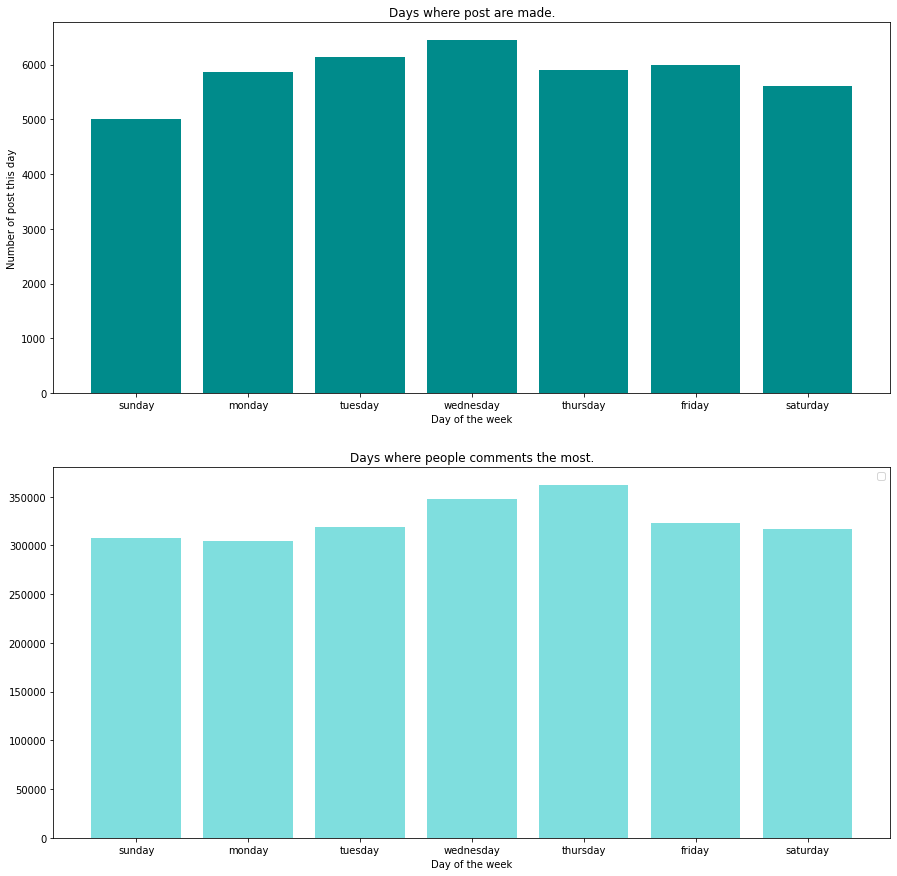

In [24]:
fig,axs=plt.subplots(figsize=(15, 15),nrows=2)

elem=[data.sun_pub,data.mon_pub,data.tue_pub,data.wed_pub,data.thu_pub,data.fri_pub,data.sat_pub]
daysnames=["sunday","monday","tuesday","wednesday","thursday","friday","saturday"]
daysvalue=[0,0,0,0,0,0,0]
sum_comments=[0,0,0,0,0,0,0]
for idx,y in enumerate(elem):
    for q in y:
        if q == 1:
            daysvalue[idx]+=1
axs[0].bar(daysnames,daysvalue, color = 'darkcyan')
axs[0].set_xlabel("Day of the week")
axs[0].set_ylabel("Number of post this day")
axs[0].set_title("Days where post are made.")


elem2=[data.sun_base,data.mon_base,data.tue_base,data.wed_base,data.thu_base,data.fri_base,data.sat_base]
comnumbert=data.C1.values.tolist()
sum_comments=[0,0,0,0,0,0,0]
for idx,y in enumerate(elem2):
    for j,q in enumerate(y):
        if q == 1:
            sum_comments[idx]+=data.C1[j]
axs[1].bar(daysnames,sum_comments,alpha=0.5,color='c')
axs[1].legend(loc='upper right')
axs[1].set_xlabel("Day of the week")
axs[1].set_title("Days where people comments the most.")




We can see here that the Pages are posting more often on wednesday. 
And you can also see that people are commenting the pots expecially on wednesday and thursday.

## Category

Text(0, 0.5, 'Number of comments')

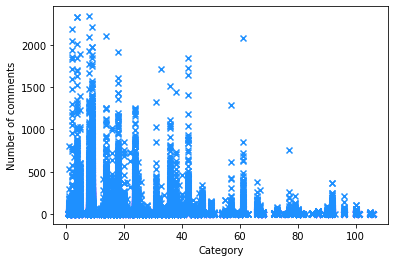

In [25]:
plt.scatter(data.Category, data.C1,color='dodgerblue', marker='x')
plt.xlabel("Category")
plt.ylabel("Number of comments")

[Text(0.5, 0, 'Nomber de comments')]

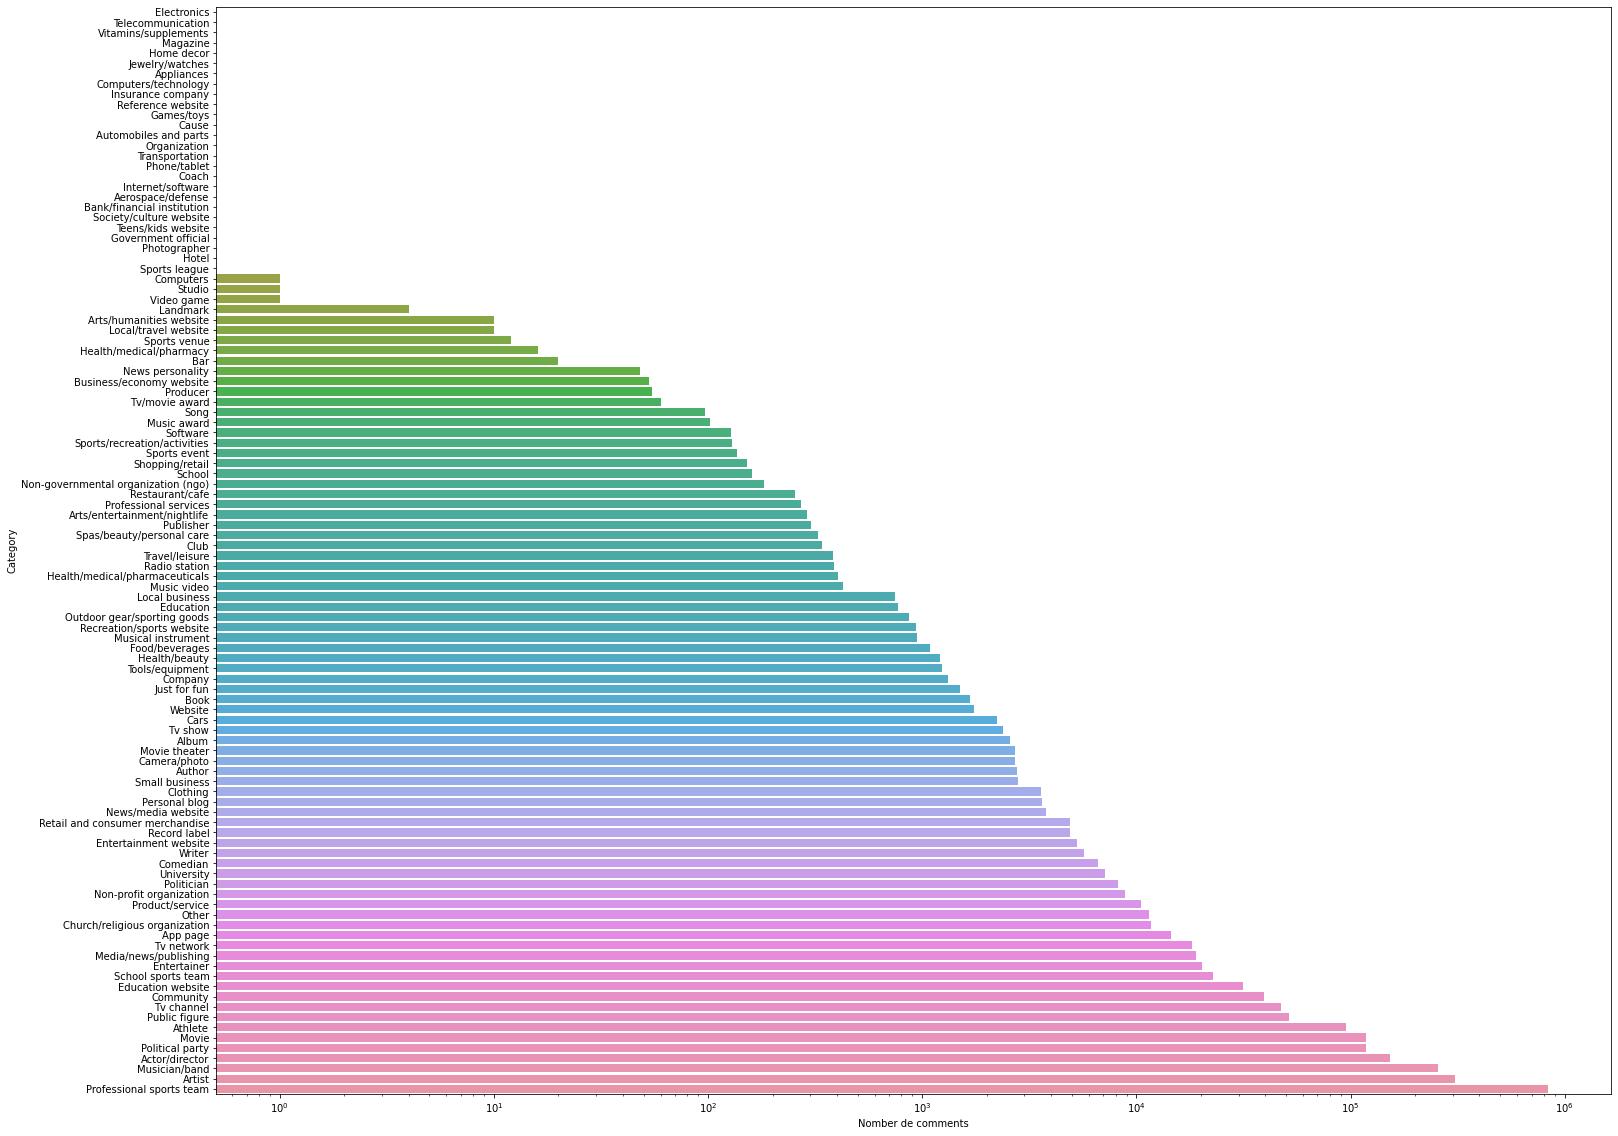

In [26]:
allcategory = ['Product/service','Public figure','Retail and consumer merchandise','Athlete','Education website','Arts/entertainment/nightlife','Aerospace/defense','Actor/director','Professional sports team',
'Travel/leisure','Arts/humanities website','Food/beverages','Record label','Movie','Song','Community','Company','Artist','Non-governmental organization (ngo)','Media/news/publishing','Cars',
'Clothing','Local business','Musician/band','Politician','News/media website','Education','Author','Sports event','Restaurant/cafe','School sports team','University','Tv show','Website',
'Outdoor gear/sporting goods','Political party','Sports league','Entertainer','Church/religious organization','Non-profit organization','Automobiles and parts','Tv channel','Telecommunication',
'Entertainment website','Shopping/retail','Personal blog','App page','Vitamins/supplements','Professional services','Movie theater','Software','Magazine','Electronics','School','Just for fun',
'Club','Comedian','Sports venue','Sports/recreation/activities','Publisher','Tv network','Health/medical/pharmacy','Studio','Home decor','Jewelry/watches','Writer','Health/beauty','Music video',
'Appliances','Computers/technology','Insurance company','Music award','Recreation/sports website','Reference website','Business/economy website','Bar','Album','Games/toys','Camera/photo','Book',
'Producer','Landmark','Cause','Organization','Tv/movie award','Hotel','Health/medical/pharmaceuticals','Transportation','Local/travel website','Musical instrument','Radio station','Other',
'Computers','Phone/tablet','Coach','Tools/equipment','Internet/software','Bank/financial institution','Society/culture website','Small business','News personality','Teens/kids website',
'Government official','Photographer','Spas/beauty/personal care','Video game']

category_value=data['Category'].values.tolist()

sum_category=[0 for i in range(len(allcategory))]

coms = data['C1'].values.tolist()

for idx,y in enumerate(category_value):
    sum_category[y-1]+=coms[idx]

df_cat = pd.DataFrame({'Category': allcategory,'Number_comments': sum_category,})

test = df_cat.sort_values("Number_comments")

plt.figure(figsize=(25,20))
fig = sns.barplot(y=test.Category, x=test.Number_comments)
fig.set(xscale='log')
fig.set(xlabel="Nomber de comments")

[Text(0.5, 0, 'Nomber of comments estimated during the next H hours')]

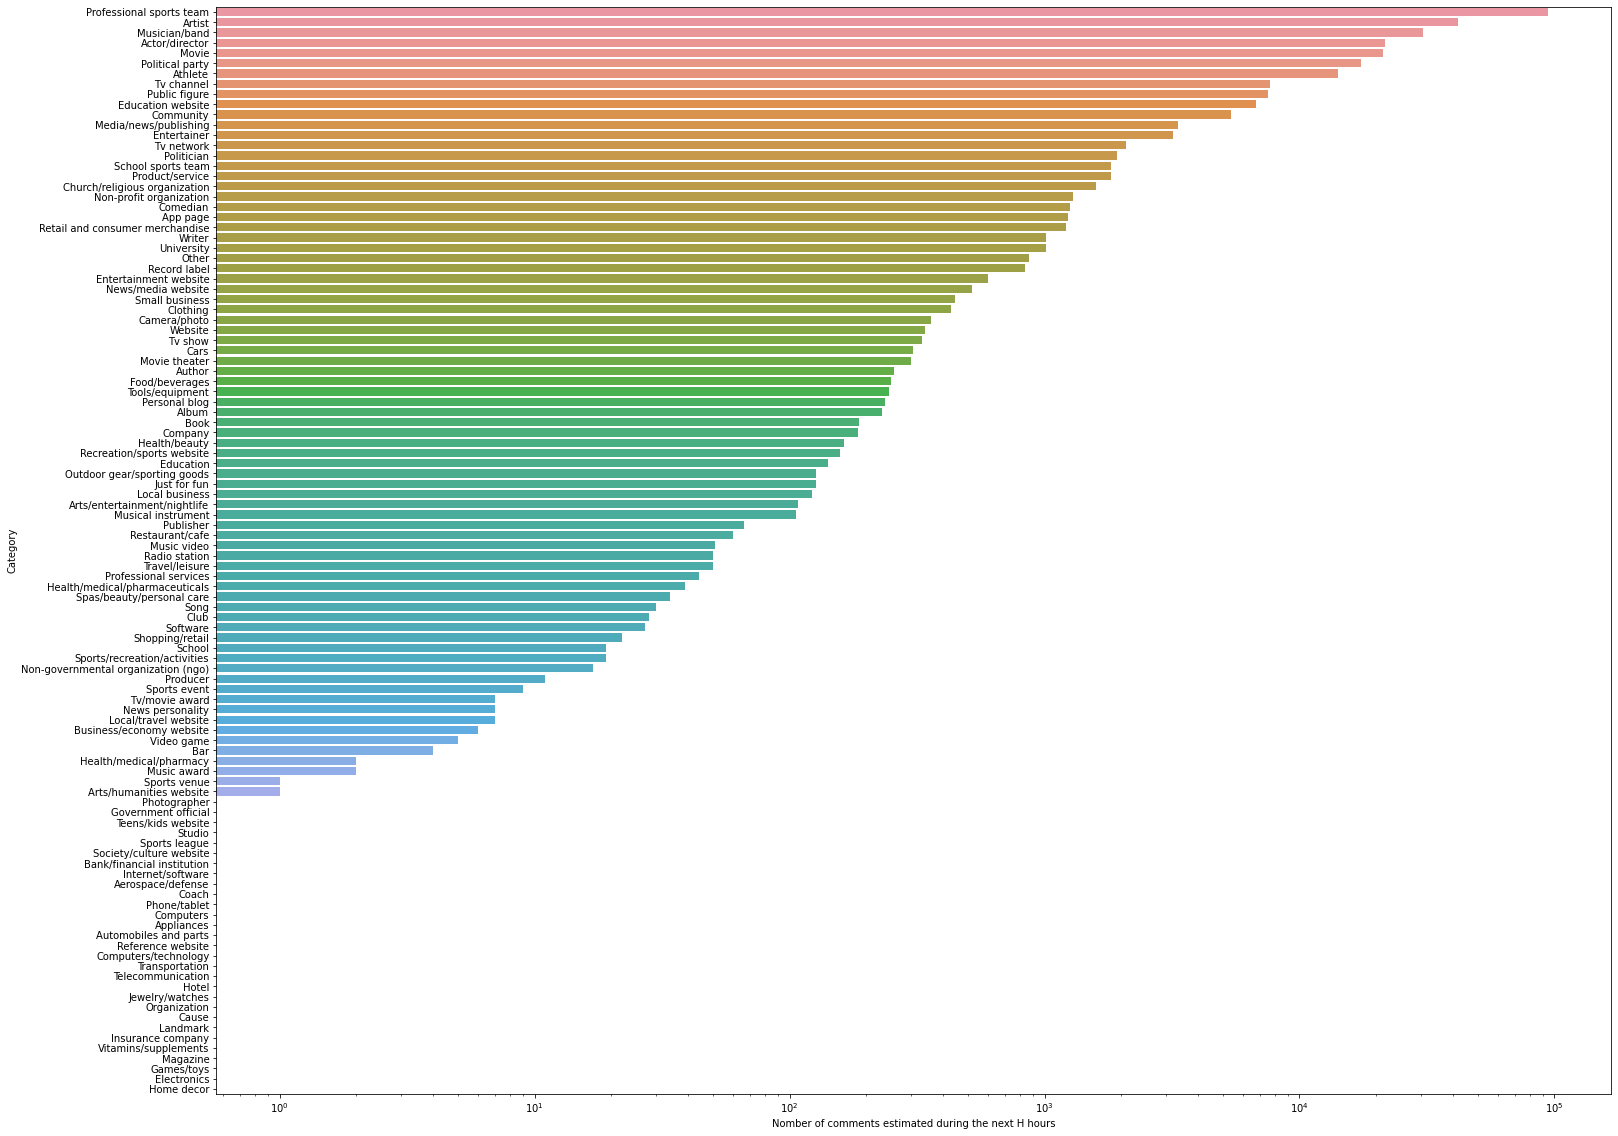

In [27]:
sum_target=[0 for i in range(len(allcategory))]

target = data['output'].values.tolist()

for idx,y in enumerate(category_value):
    sum_target[y-1]+=target[idx]

df_target = pd.DataFrame({'Category': allcategory,'Number_target': sum_target,})

test = df_target.sort_values("Number_target", ascending=False)

plt.figure(figsize=(25,20))
fig = sns.barplot(y=test.Category, x=test.Number_target)
fig.set(xscale='log')
fig.set(xlabel="Nomber of comments estimated during the next H hours")

These two figures help us to understand to understand which are the most active category on facebook. We have here the total of comments when we extract the data and the estimated comments a post will receive. We can see that it's not equal. If your page talks about Professionnal sport teams, artists, musicians, actors, movies, political parties and athletes you will get a lot of comments and more than any other category.

# Models

In [28]:
#get all the columns from the dataframe
columns=data.columns.tolist()

#filter the columns to remove data we do not want
columns=[c for c in columns if c not in ['output']]

# let's separe the output from the rest here
x=data[['Page_likes', 'Checkins', 'Returns', 'Category', 'C1', 'C2',
       'C3', 'C4', 'C5', 'baseTime', 'length', 'shares', 'hrs',
       'sun_pub','mon_pub', 'tue_pub', 'wed_pub','thu_pub', 'fri_pub', 'sat_pub', 'sun_base',
       'mon_base','tue_base', 'wed_base', 'thu_base','fri_base','sat_base']]
y=data['output']

#print the shape of x and y
print(x.shape)
print(y.shape)


(40949, 27)
(40949,)


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5, random_state=7)
print(len(x_train))
print(len(x_test))

20474
20475


## Linear Regression

In [30]:
model_lr = linear_model.LinearRegression() 
model_lr.fit(x_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred_lr = model_lr.predict(x_test)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rms_lr = np.sqrt(mse_lr)

r2_lr = model_lr.score(x_test,y_test)

print('rms',rms_lr,'r2',r2_lr)

rms 28.079626196629313 r2 0.29533652805097044


The result are not very good with the linear regression we will try otherwise.

## Random Forest

In [35]:
model_rf = RandomForestRegressor(n_estimators=20)
model_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred_rf = model_rf.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
rms_rf = np.sqrt(mse_rf)

r2_rf = model_rf.score(x_test,y_test)

print('rms',rms_rf,'r2',r2_rf)

rms 21.140188341776028 r2 0.6005919446308561


# Decision tree

In [37]:
model_dt = DecisionTreeRegressor(max_depth=5) #max_depth = 5 gives us the most accurate decision tree
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
y_pred_dt = model_dt.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_dt)
rms_dt = np.sqrt(mse_dt)

r2_dt = model_dt.score(x_test,y_test)

print('rms',rms_dt,'r2',r2_dt)

rms 22.656142602535358 r2 0.5412553057606126


# Grid

In [40]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators': [int(x) for x in np.linspace(start=10,stop=120,num=10)]}
grid=GridSearchCV(RandomForestRegressor(),parameters)
grid.fit(x_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.585966665903294 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=34, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [41]:
parameters={'max_features':['auto', 'sqrt'],'n_estimators': [int(x) for x in np.linspace(start=90,stop=120,num=5)]}
grid=GridSearchCV(RandomForestRegressor(),parameters)
grid.fit(x_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.5852672135868323 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=97, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


The best one is the one with 34 estimators but it is really close to the other.

# Choosing a model

In [44]:
scores=[r2_lr,r2_rf,r2_dt,0.585966665903294]
models=['Linear Regression','Random Forest','Decision Tree','Grid 34  estimators']
mix={'score':scores,'model':models}
df_score=pd.DataFrame(mix)
df_score

,score,model
0,0.295337,Linear Regression
1,0.600592,Random Forest
2,0.541255,Decision Tree
3,0.585967,Grid 34 estimators


# API

In [43]:
# modelPickle.pkl

import pickle

ModelFile='model.pkl'

with open(ModelFile, 'wb') as file:
    pickle.dump(model_rf, file)
